# Приоритизация гипотез и A/B-тестирование для увеличения выручки в интернет-магазине 

Я являюсь аналитиком крупного интернет-магазина. Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.


В ходе данного проекта будут выполнены следующие задачи:


* Анализ предоставленных данных


* Приоритизация гипотез


* Анализ A/B-теста


* Решение по результатам теста:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

В ходе работы будут использоваться следующие данные:


1) Данные для первой части хранятся в файле /datasets/hypothesis.csv.

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


2) Данные для второй части хранятся в двух файлах. Первый из них /datasets/orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.


Второй файл /datasets/visitors.csv. 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Подготовка и анализ исходных данных

### Импортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import stats as st

### Проанализируем исходные данные

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_8\\hypothesis.csv'),
    pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_8\\orders.csv'),
    pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_8\\visitors.csv')
)

In [3]:
def data_first_view(data):
    # Вывод первых 10 строк
    print('*' * 50)
    print("Первые 10 строк данных:")
    display(data.head(10))
    
    # Информация о данных
    print('*' * 50)
    print("\nИнформация о данных:")
    display(data.info())
    
    # Имена столбцов
    print('*' * 50)
    print("\nИмена столбцов:")
    display(data.columns)
    
    # Описательная статистика
    print('*' * 50)
    print("\nОписательная статистика:")
    display(data.describe())
    
    # Количество пропущенных значений
    print('*' * 50)
    print("\nКоличество пропущенных значений в каждом столбце:")
    display(data.isna().sum())
    
    # Количество дубликатов
    print('*' * 50)
    print("\nКоличество дубликатов:")
    display(data.duplicated().sum())

#### Информация о файле hypothesis

In [4]:
pd.set_option('display.max_colwidth', 500)

In [5]:
data_first_view(hypothesis)

**************************************************
Первые 10 строк данных:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

**************************************************

Имена столбцов:


Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

**************************************************

Описательная статистика:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


**************************************************

Количество пропущенных значений в каждом столбце:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

**************************************************

Количество дубликатов:


0

Данные подготовлены хорошо, так как нет пропусков и дубликатов. Стоит обратить внимание на названия столбцов, для удобной работы переведем их в нижний регистр.

In [6]:
hypothesis.rename(columns=lambda x: x.lower(), inplace=True)
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### Информация о файлах orders и visitors

In [7]:
data_first_view(orders)

**************************************************
Первые 10 строк данных:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

**************************************************

Имена столбцов:


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

**************************************************

Описательная статистика:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


**************************************************

Количество пропущенных значений в каждом столбце:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

**************************************************

Количество дубликатов:


0

В этом случае для дальнейшей работы стоит перевести столбец с информацией о дате к типу datetime.

In [8]:
orders['date'] = pd.to_datetime(orders['date'])

In [9]:
data_first_view(visitors)

**************************************************
Первые 10 строк данных:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

**************************************************

Имена столбцов:


Index(['date', 'group', 'visitors'], dtype='object')

**************************************************

Описательная статистика:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


**************************************************

Количество пропущенных значений в каждом столбце:


date        0
group       0
visitors    0
dtype: int64

**************************************************

Количество дубликатов:


0

Также переведм столбец date к нужному формату.

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'])

**Промежуточный вывод по первому разделу:**

Предоставленные данные хорошо подготовлены, пропусков и дубликатов нет. Однако, нужно обратить внимание на:

* В файле с гипотезами стоит обратить внимание на название столбцов.

* В файлах с информацией о заказах и количеством пользователей нужно перевести столбцы date к типу datetime

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. 

In [11]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

In [12]:
hypothesis.sort_values(by='ice', ascending=False)


,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [13]:
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**ICE** (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. Данный способ состоит из следующих компонентов: 

* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 

* Efforts — сколько стоит протестировать эту гипотезу. 


Согласно значению данного показателя мы видим, что в приорете стоит гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения".

### Применим фреймворк RICE для приоритизации гипотез.

In [14]:
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

In [15]:
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [16]:
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Фреймворк **RICE** является модификацией **ICE** и включает в себя ещё один компонент:

* Reach — скольких пользователей затронет изменение, которое вы хотите внести.

Согласно данному фреймворку самой приоретеной гипотезой является гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

**Промежуточный вывод по разделу 2:**

* Согласно значению фреймворка **ICE** мы видим, что в приорете стоит гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения".

* Согласно фреймворку самой приоретеной гипотезой является гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

* Такие расхождения вызваны дополнительным компонентом **Reach** в фрейморке **RICE**, благодаря которому мы можем оценить количество пользователей, которые будут затронуты из-за внесенного изменения.

* Поэтому рекомендую ставить в приоритет гипотезу №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", у которой фреймворк RICE наибольший и равен 112.

## Анализ A/B-теста

### Подготовка данных

In [17]:
# Куммулятивные данные файла visitors по датам для группы A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Куммулятивные данные файла visitors по датам для группы A

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Куммулятивные данные файла orders по датам для группы A

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Куммулятивные данные файла orders по датам для группы B

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Отразим все собранные данные в едином датафрейме

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



In [18]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  31 non-null     datetime64[ns]
 1   ordersPerDateA        31 non-null     int64         
 2   revenuePerDateA       31 non-null     int64         
 3   ordersPerDateB        31 non-null     int64         
 4   revenuePerDateB       31 non-null     int64         
 5   ordersCummulativeA    31 non-null     int64         
 6   revenueCummulativeA   31 non-null     int64         
 7   ordersCummulativeB    31 non-null     int64         
 8   revenueCummulativeB   31 non-null     int64         
 9   visitorsPerDateA      31 non-null     int64         
 10  visitorsPerDateB      31 non-null     int64         
 11  visitorsCummulativeA  31 non-null     int64         
 12  visitorsCummulativeB  31 non-null     int64         
dtypes: datetime64[ns](1), 

Для удобной работы мы создали единый датафрейм с данными по группам:

* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

###  График кумулятивной выручки по группам.

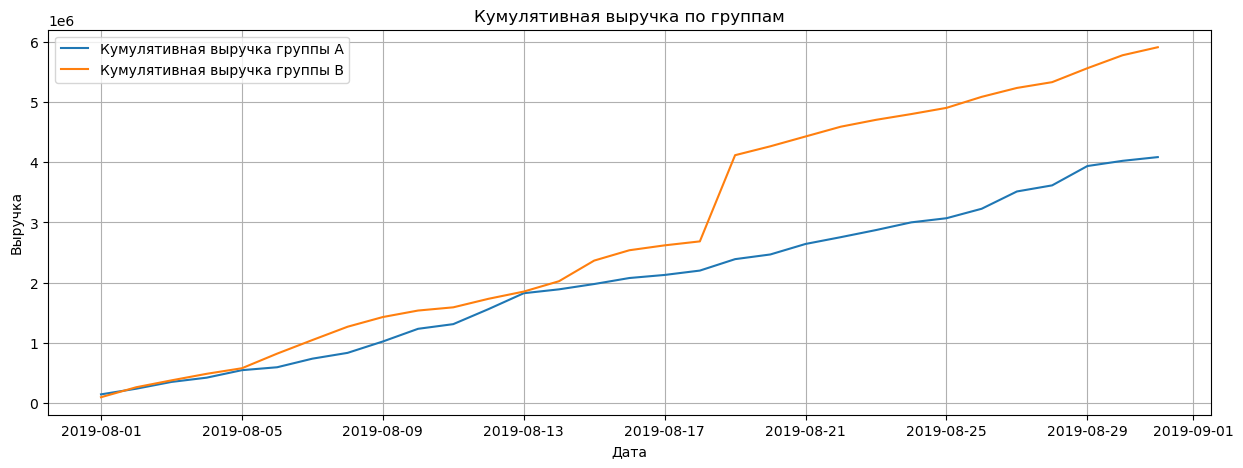

In [20]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['revenueCummulativeA'], label='Кумулятивная выручка группы A')
plt.plot(data['date'], data['revenueCummulativeB'], label='Кумулятивная выручка группы B')

plt.grid(True)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

plt.show()

Из графика куммулятивной выручки по группам мы видим, что кривая группы B превосходит кривую группы А, однако, стоит обратить внимание на резкий скачок кривой B после 17 августа 2018 года. Такое изменнение могло произойти из-за аномальных заказов, которые нужно будет позже отсечь. 

### График кумулятивного среднего чека по группам

In [21]:
data['averageCheckCummulativeA'] = data['revenueCummulativeA'] / data['ordersCummulativeA']
data['averageCheckCummulativeB'] = data['revenueCummulativeB'] / data['ordersCummulativeB']

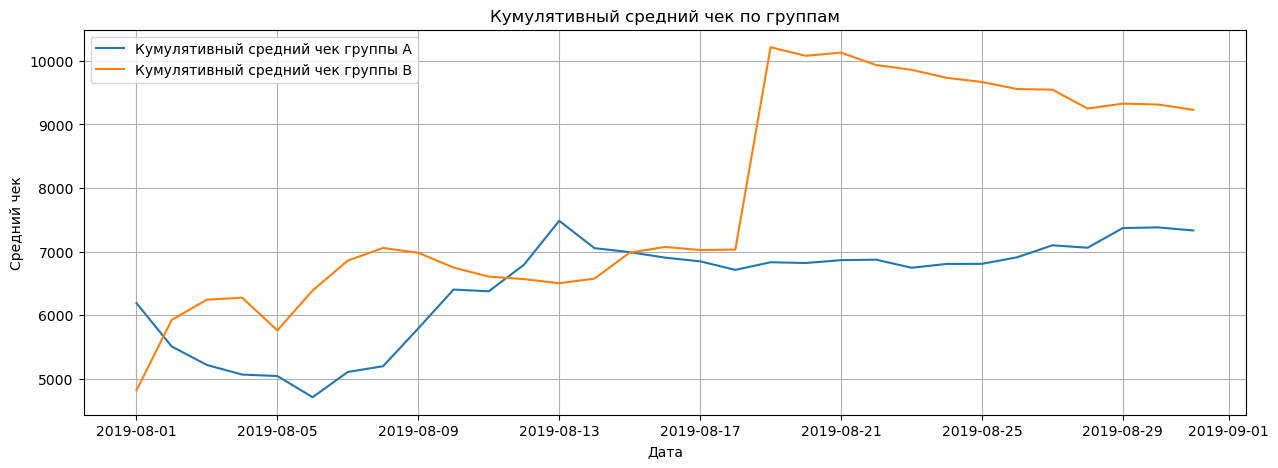

In [22]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['averageCheckCummulativeA'], label='Кумулятивный средний чек группы A')
plt.plot(data['date'], data['averageCheckCummulativeB'], label='Кумулятивный средний чек группы B')

plt.grid(True)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()

plt.show()

Из графика видим, что кривая группы B опережает кривую группы А на протяжении почти всего периода исследования, видим резкий скачок группы А 13 августа. Также мы видим резкое изменение куммулятивного среднего чека группы В после 17 августа, затем рост замедляется, что дает повод задуматься об аномальных заказах, сумма которых сильно превышает среднее значение. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [23]:
data['averageCheckCummulative'] = data['averageCheckCummulativeB'] / data['averageCheckCummulativeA'] - 1

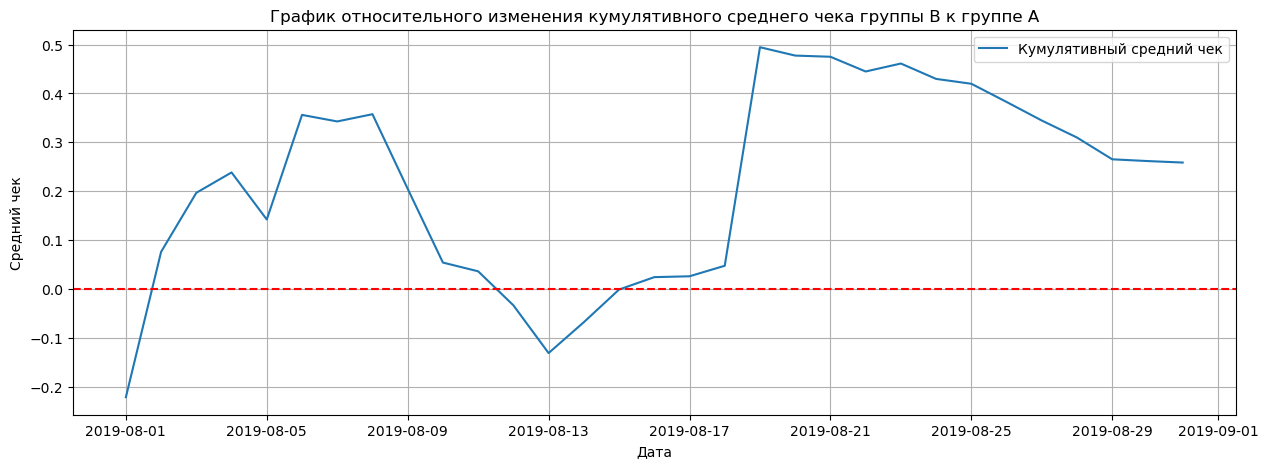

In [24]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['averageCheckCummulative'], label='Кумулятивный средний чек')

plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.axhline(y=0, linestyle='--', color='red')

plt.show()

"График относительного изменения кумулятивного среднего чека группы B к группе A" показывает, что в основном значения среднего чека группы B значительно превышает значения среднего чека группы А, но линия нестабильна. Видим резкие скачки, к примеру с 1 по 9 августа и с 17 по 19 августа, а также резкие падения, с 7 по 13 августа и с 19 августа до конца периода исследования.
Все три графика демонстрируют одну картину, на это могут влиять выбросы.

### График кумулятивного среднего количества заказов на посетителя по группам

In [25]:
data['averageOrdersCummulativeA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['averageOrdersCummulativeB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

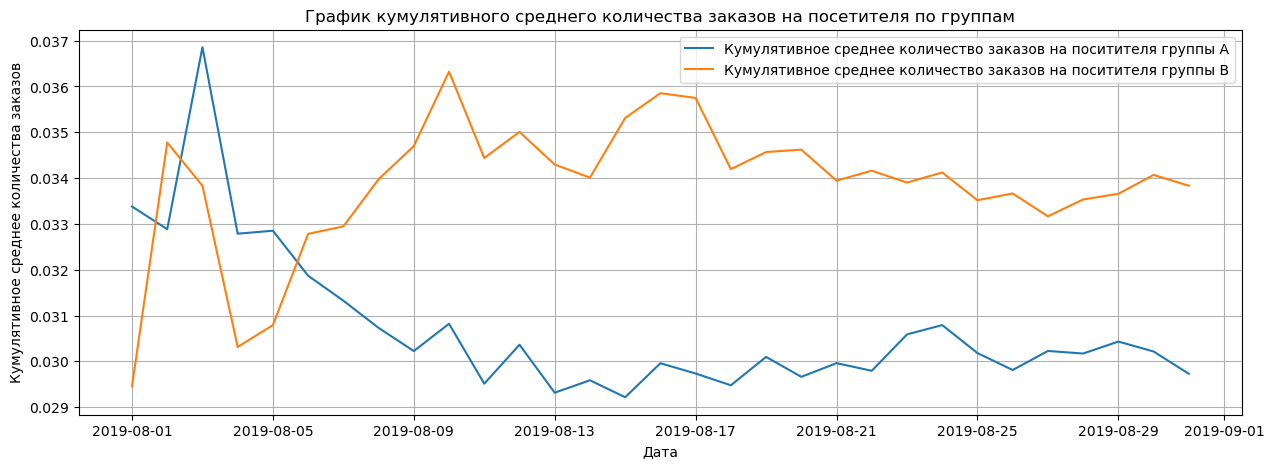

In [26]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['averageOrdersCummulativeA'], label='Кумулятивное среднее количество заказов на поситителя группы A')
plt.plot(data['date'], data['averageOrdersCummulativeB'], label='Кумулятивное среднее количество заказов на поситителя группы B')

plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количества заказов')
plt.legend()

plt.show()

В начале рассматриваемого периода среднее количество заказов на поситителя группы А превышало среднее количество заказов на поситителя группы В, но с 6 августа картина поменялась и кривая группы В значительно опережала кривую группы А.  

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [27]:
data['averageOrdersCummulative'] = data['averageOrdersCummulativeB'] / data['averageOrdersCummulativeA'] - 1

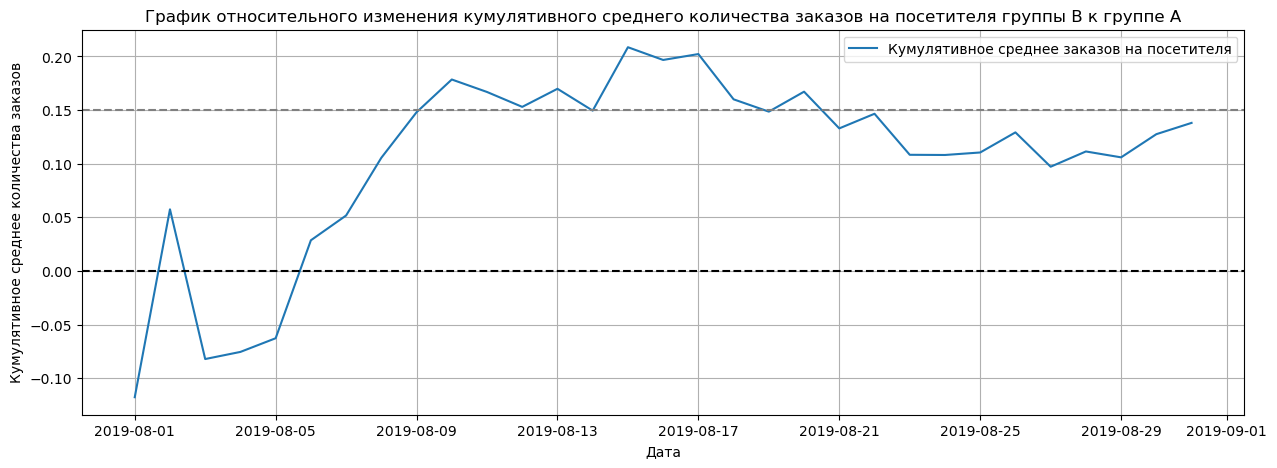

In [28]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['averageOrdersCummulative'], label='Кумулятивное среднее заказов на посетителя')

plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количества заказов')
plt.legend()
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=0.15, linestyle='--', color='grey')

plt.show()

Видим, что с 5 августа начался резкий рост показателя кумулятивного среднего количества заказов на посетителя группы B, однако с 17 августа видим спад показателя. На протяжении всего периода показатели группы B опережали показатели группы A. Однако, делать выводы по тесту ещё рано, так как кривая ещё не вышла на плато, также стоит рассмотреть показатели "сырых" и "очищенных" данных.

### Точечный график количества заказов по пользователям

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

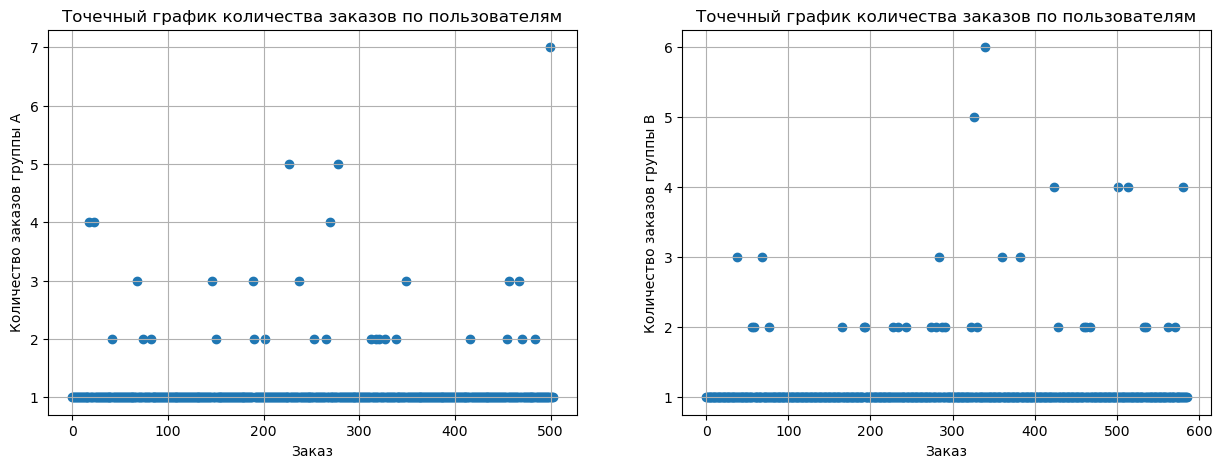

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
a_values = pd.Series(range(0, len(ordersByUsersA)))
plt.scatter(a_values, ordersByUsersA['orders'])
plt.grid(True)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Заказ')
plt.ylabel('Количество заказов группы А')


plt.subplot(1, 2, 2)
a_values = pd.Series(range(0, len(ordersByUsersB)))
plt.scatter(a_values, ordersByUsersB['orders'])
plt.grid(True)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Заказ')
plt.ylabel('Количество заказов группы B')

plt.show()

На основе точечных графиков мы можем сделать вывод о том, что в основном группы совершали один заказ, также присутствуют случаи с 2-мя или 3-мя заказами, то что выше этих значений может быть аномалиями. 

### Найдем 95-й и 99-й перцентили количества заказов на пользователя.

In [31]:
# Рассчитываем перцентили для группы A
percentiles_A = np.percentile(ordersByUsersA['orders'], [95, 99])
print('95-й перцентиль количества заказов на пользователя группы A:', percentiles_A[0])
print('99-й перцентиль количества заказов на пользователя группы A:', round(percentiles_A[1], 2))
print()
# Рассчитываем перцентили для группы B
percentiles_B = np.percentile(ordersByUsersB['orders'], [95, 99])
print('95-й перцентиль количества заказов на пользователя группы B:', percentiles_B[0])
print('99-й перцентиль количества заказов на пользователя группы B:', round(percentiles_B[1], 2))

95-й перцентиль количества заказов на пользователя группы A: 2.0
99-й перцентиль количества заказов на пользователя группы A: 3.98

95-й перцентиль количества заказов на пользователя группы B: 2.0
99-й перцентиль количества заказов на пользователя группы B: 3.15


Исходя из полученных данных следует принять за аномальное значение количество заказов превышающее 3 заказа, так как не более 5% пользователей в обеих группах совершали более 2-х заказов, а более 3 заказов совершали не более 1% пользователей.

### Точечный график стоимостей заказов

In [32]:
revenueByUsersA = orders.query('group == "A"')['revenue']
revenueByUsersB = orders.query('group == "B"')['revenue']

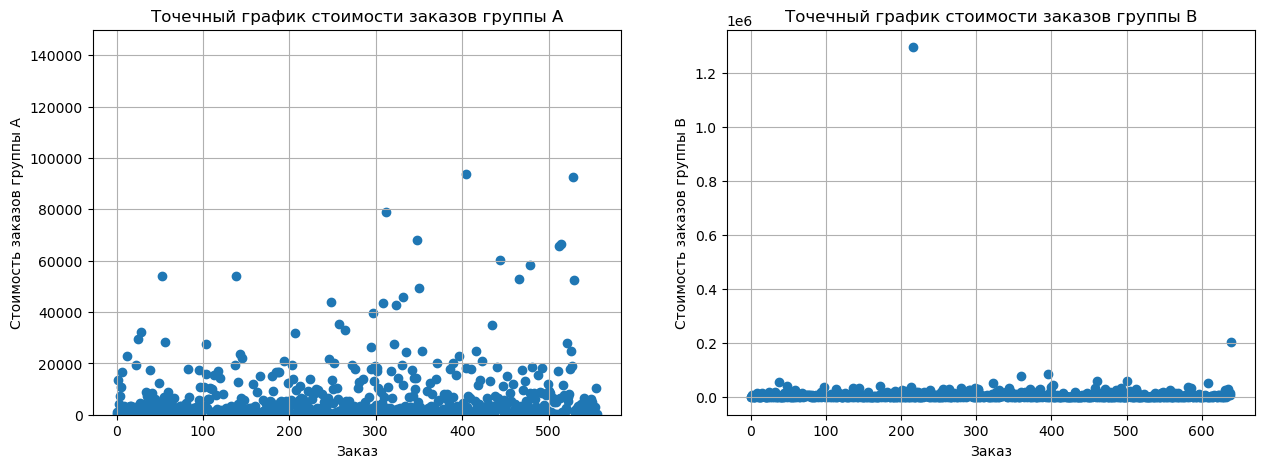

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
a_values = pd.Series(range(0, len(revenueByUsersA)))
plt.scatter(a_values, revenueByUsersA)
plt.grid(True)
plt.title('Точечный график стоимости заказов группы А')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказов группы А')
plt.ylim(0, 150000)


plt.subplot(1, 2, 2)
b_values = pd.Series(range(0, len(revenueByUsersB)))
plt.scatter(b_values, revenueByUsersB)
plt.grid(True)
plt.title('Точечный график стоимости заказов группы B')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказов группы B')


plt.show()

Видим, что в основном стоимость заказа не превышала 20 000 в обеих группах, однако стоит обратить внимание на особый аномальный выброс группы B равный 1 200 000, который может являтсся причиной резкого роста по показателю выручки и среднего чека на графиках выше.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [34]:
# Рассчитываем перцентили для группы A
percentiles_A = np.percentile(revenueByUsersA, [95, 99])
print('95-й перцентиль стоимости заказа группы A:', round(percentiles_A[0], 2))
print('99-й перцентиль стоимости заказа группы A:', round(percentiles_A[1], 2))
print()
# Рассчитываем перцентили для группы B
percentiles_B = np.percentile(revenueByUsersB, [95, 99])
print('95-й перцентиль стоимости заказа группы B:', round(percentiles_B[0], 2))
print('99-й перцентиль стоимости заказа группы B:', round(percentiles_B[1], 2))

95-й перцентиль стоимости заказа группы A: 26718.0
99-й перцентиль стоимости заказа группы A: 62764.4

95-й перцентиль стоимости заказа группы B: 28787.45
99-й перцентиль стоимости заказа группы B: 55579.06


На основе данных о перцентилях можем принять границу стоимости заказа в 30 000, свыше этого будут находится аномальные заказы, так как для группы А 95-й перцентиль составляет 26 718,0, а для группы В 95-й перцентиль составляет 28 787,45.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для начала сформулируем гипотезы:

**H0:** Различий между средним количеством заказов на посетителя в группах нет


**H1:** Различия между средним количеством заказов на посетителя в группых есть


Уровень статистической значимости примем за 0.05, применим статистический критерий Манна-Уитни для того, чтобы провести тестирование.

In [35]:
average_ordersA = pd.concat(
    [ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

average_ordersB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(average_ordersA, average_ordersB)[1]))

print("Относительная разница: {0:.3f}".format(average_ordersB.mean() / average_ordersA.mean() - 1))

P-value: 0.017
Относительная разница: 0.138


* По "сырым" данным мы получили p-value равное 0.017, тем самым мы можем отвергнуть нулевую гипотезу о том, что различий между средним количеством заказов на посетителя в группах нет.


* Относительная разница между показателями среднего количества заказов на посетителя составляет 0.138, то есть среднее количество заказов на посетителя группы B на 13.8% больше группы А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Также сначала сформулируем гипотезы.

**H0:** Статистически значимых различий в среднем чеке заказов между группами нет


**H1:** Статистически значимые различия в среднем чеке заказов между группами есть

Уровень статистической значимости примем за 0.05.

In [37]:
print('P-value: {0:.3f}'.format(st.mannwhitneyu(revenueByUsersA, revenueByUsersB)[1]))
print('Различие в среднем чеке: {0:.3f}'.format(revenueByUsersB.mean()/revenueByUsersA.mean()-1))

P-value: 0.729
Различие в среднем чеке: 0.259


По "сырым" данным мы установили, что p-value равняется 0.729, что значительно больше уровня статистической значимости, значит причин отвергать нулевую гипотезу у нас нет, то есть статистически значимых различий в среднем чеке заказов между группами нет.

Различие в среднем чеке между группой B и А составляет 25.9%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для начала отберем пользователей, которые освершили более 3-х заказов, а также заказы, сумма которых превысила 30 000, и объединим их в одну таблицу. Такие значения мы принимаем за аномалии на основе ранее вычесленных перцентилей.

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0])

57


Всего аномальных значений у нас 57. Узнаем как их действия повлияли на результат теста, оценив следующие гипотезы:

**H0:** Различий между средним количеством заказов на посетителя в группах нет

**H1:** Различия между средним количеством заказов на посетителя в группых есть

Уровень значимости примем за 0.05

In [39]:
averageOrdersAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

averageOrdersBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
print('P-value: {0:.3f}'.format(st.mannwhitneyu(averageOrdersAFiltered, averageOrdersBFiltered)[1]))
print('Относительная разница: {0:.3f}'.format(averageOrdersBFiltered.mean()/averageOrdersAFiltered.mean()-1))

P-value: 0.018
Относительная разница: 0.148


P-value составило 0.018, что значительно меньше статистического уровня значимости (как и по сырым данным), поэтом нулевую гипотезу о том, что "Различий между средним количеством заказов на посетителя в группах нет", мы отвергаем.

Разница между средним количеством заказов группы B и группы A в этом случае составляет 14.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**H0:** Статистически значимых различий в среднем чеке заказов между группами нет

**H1:** Статистически значимые различия в среднем чеке заказов между группами есть

Уровень статистической значимости примем за 0.05.

In [41]:
print(
    'P-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.958
Относительная разница: -0.020


P-value в данном случае увеличился до 0.958, что значительно больше уровня статистической значимости, поэтому основания для того, чтобы отвергнуть нулевую гипотезу у нас нет.

Обратим внимание, что различия в среднем чеке по "очищенным" данным между группой B и группой А, составили (-2.0%), в то время как по сырым данным данный показатель равнялся 25.9%.

### Решения по результатам А/В теста

Основной задачей было определить поможет ли выбранная стратегия увеличить выручку интернет-магазина. На выручку непосредственно влияет количество заказов на пользователя. По результатам А/В теста мы определили, что различия по данному показателю между группами есть и оно статистически значимо. По "очищенным" данным мы увидили, что среднее количество заказов на пользоватля группы В превышает среднее количество заказов на пользователей группы А на 14,8%, поэтому рекомендую остановить тест и зафиксировать победу группы В, несмотря на то, что различий в среднем чеке между группами нет. 

**Промежуточный вывод по разделу 3.**

* На данном шаге для удобной работы мы создали единый датафрейм data с кумулятивными данными, на основе которого были проведены следующие исследования:


1) Из графика куммулятивной мы выручки по группам выяснили, что кривая группы B превосходит кривую группы А, однако, стоит обратить внимание на резкий скачок кривой B после 17 августа 2018 года. Такое изменнение могло произойти из-за аномальных заказов.


2) По графику кумулятивного средне чека мы увидели, что кривая группы B опережает кривую группы А на протяжении почти всего периода исследования, видим резкий скачок группы А 13 августа. Также есть резкое изменение куммулятивного среднего чека группы В после 17 августа, затем рост замедляется, что дает повод задуматься об аномальных заказах, сумма которых сильно превышает среднее значение.


3) "График относительного изменения кумулятивного среднего чека группы B к группе A" показал, что в основном значения среднего чека группы B значительно превышает значения среднего чека группы А, но линия нестабильна. Видим резкие скачки, к примеру с 1 по 9 августа и с 17 по 19 августа, а также резкие падения, с 7 по 13 августа и с 19 августа до конца периода исследования. Все три графика продемонстрировали одну картину.


4) В начале рассматриваемого периода среднее количество заказов на поситителя группы А превышало среднее количество заказов на поситителя группы В, но с 6 августа картина поменялась и кривая группы В значительно опережала кривую группы А.


5) График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе показал, что с 5 августа начался резкий рост данного показателя у группы B, однако с 17 августа произошел спад. На протяжении всего периода показатели группы B опережали показатели группы A.


6) На основе точечных графиков количества заказов мы сдели вывод о том, что в основном группы совершали один заказ, также присутствуют случаи с 2-мя или 3-мя заказами, то что выше этих значений может быть аномалиями.


7) Нашли 95-й и 99-й перцентили количества закзов, исходя из полученных данных следует принять за аномальное значение количество заказов превышающее 3 заказа, так как не более 5% пользователей в обеих группах совершали более 2-х заказов, а более 3 заказов совершали не более 1% пользователей.


8) Точечный график стоимости заказа дал понять, что в основном стоимость заказа не превышала 20 000 в обеих группах, однако стоит обратить внимание на особый аномальный выброс группы B равный 1 200 000, который может являтсся причиной резкого роста по показателю выручки и среднего чека на графиках выше.


9) На основе данных о перцентилях приняли границу стоимости заказа в 30 000, свыше этого будут находится аномальные заказы, так как для группы А 95-й перцентиль составляет 26 718,0, а для группы В 95-й перцентиль составляет 28 787,45.


10) Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. В ходе тестирования мы выяснили, что получили p-value равное 0.017, которое значительно меньше уровня статистической значимости, тем самым мы можем отвергнуть нулевую гипотезу о том, что различий между средним количеством заказов на посетителя в группах нет. Относительная разница между показателями среднего количества заказов на посетителя составляет 0.138, то есть среднее количесвто заказов на посетителя группы B на 13.8% больше группы А.


11) Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. По "сырым" данным мы установили, что p-value равняется 0.729, что значительно больше уровня статистической значимости, значит причин отвергать нулевую гипотезу у нас нет, то есть статистически значимых различий в среднем чеке заказов между группами нет. Различие в среднем чеке между группой B и А составляет 25.9%. 


12) Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. P-value составило 0.018, что значительно меньше статистического уровня значимости (как и по сырым данным), поэтом нулевую гипотезу о том, что "Различий между средним количеством заказов на посетителя в группах нет", мы отвергаем. Разница между средним количеством заказов группы B и группы A в этом случае составляет 14.8%.


13) Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. P-value в данном случае увеличился до 0.958, что значительно бельше уровня статистической значимости, поэтому основания для того, чтобы отвергнуть нулевую гипотезу у нас нет. Обратим внимание, что различия в среднем чеке по "очищенным" данным между группой B и группой А, составили (-2.0%), в то время как по сырым данным данный показатель равнялся 25.9%.


14) Основной задачей было определить поможет ли выбранная стратегия увеличить выручку интернет-магазина. На выручку непосредственно влияет количество заказов на пользователя. По результатам А/В теста мы определили, что различия по данному показателю между группами есть и оно статистически значимо. По "очищенным" данным мы увидили, что среднее количество заказов на пользоватля группы В превышает среднее количество заказов на пользователей группы А на 14,8%, поэтому рекомендую остановить тест и зафиксировать победу группы В, несмотря на то, что различий в среднем чеке между группами нет. 

## Итоговый вывод

1) Подводя итог, можно сказать о том, что исходные данные предоставленные нам хорошо подготовлены, пропусков и дубликатов нет. Однако, нужно обратить внимание на:

* В файле с гипотезами стоит обратить внимание на название столбцов. Привести их к нижнему регистру.

* В файлах с информацией о заказах и количеством пользователей нужно перевести столбцы date к типу datetime

2) В ходе выполнения проекта мы расчитывали два фреймворка ICE и RICE. 


* Согласно значению фреймворка ICE мы видим, что в приорете стоит гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения". Согласно фреймворку RICE самой приоретеной гипотезой является гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".


* Такие расхождения вызваны дополнительным компонентом Reach в фрейморке RICE, благодаря которому мы можем оценить количество пользователей, которые будут затронуты из-за внесенного изменения. Поэтому рекомендую ставить в приоритет гипотезу №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", у которой фреймворк RICE наибольший и равен 112.

3) При анализе A/B теста мы выяснили следующее:


**Выручка и средний чек:**

* График кумулятивной выручки показал, что группа B опережает группу A. Однако после 17 августа 2018 года наблюдается резкий скачок выручки в группе B, возможно из-за аномальных заказов.

* Средний чек группы B также превосходит группу A, но есть нестабильности. Резкие скачки и падения в относительном изменении среднего чека подтверждают это.

* Статистически значимых различий в среднем чеке между группа не обнаружилось.

**Среднее количество заказов на посетителя:**

* Изначально среднее количество заказов на посетителя у группы A было выше, но с 6 августа группа B начала опережать группу A.

* По “сырым” данным разница в среднем количестве заказов на посетителя составляет 13.8% в пользу группы B.

* По “очищенным” данным разница в среднем количестве заказов на посетителя также в пользу группы B – 14.8%.


**Аномалии:**

* Аномальные заказы существуют. По перцентилям, заказы свыше 3-х можно считать аномальными.

* Стоимость заказа в группе B имеет выброс в 1 200 000, который может повлиять на общую выручку.


Основной задачей было определить поможет ли выбранная стратегия увеличить выручку интернет-магазина. На выручку непосредственно влияет количество заказов на пользователя. По результатам А/В теста мы определили, что различия по данному показателю между группами есть и оно статистически значимо. По "очищенным" данным мы увидили, что среднее количество заказов на пользоватля группы В превышает среднее количество заказов на пользователей группы А на 14,8%, поэтому рекомендую остановить тест и зафиксировать победу группы В, несмотря на то, что различий в среднем чеке между группами нет.
